<a href="https://colab.research.google.com/github/Shaikruheen/amazon-clone/blob/main/whatsapp_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving whatsapp_chat.txt to whatsapp_chat (1).txt
Data Science Community
Messages: 5
Media: 0
Emojis: 2
Links: 0


<ipython-input-24-430511ceed3a>:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


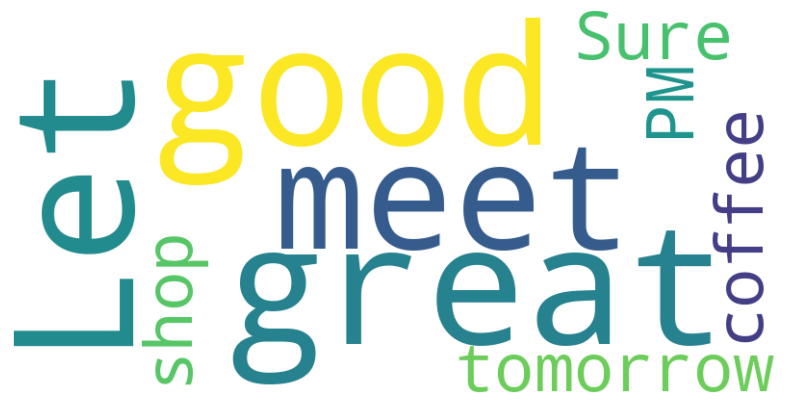

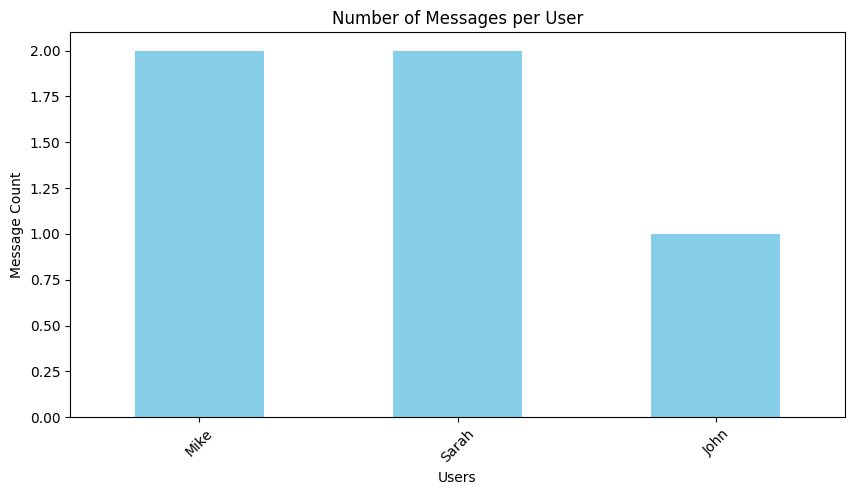


Author-wise Statistics:
  Author  total_messages  media_messages  emojis  links
0   John               1               0       1      0
1   Mike               2               0       0      0
2  Sarah               2               0       1      0


In [24]:
import re
import pandas as pd
import numpy as np
import emoji
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Function to check if a line starts with a date and time
def startsWithDateAndTime(s):
    pattern = r'^\d{1,2}/\d{1,2}/\d{2,4},? \d{1,2}:\d{2} [APap][Mm] - '
    return bool(re.match(pattern, s))

# Function to check if a line has an author
def FindAuthor(s):
    return len(s.split(':')) == 2

# Function to extract data points
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    author = None

    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])

    return date, time, author, message

# Upload file in Google Colab
from google.colab import files
uploaded = files.upload()

# Read the chat file
chat_file = list(uploaded.keys())[0]
parsedData = []

with open(chat_file, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDateAndTime(line):
            if messageBuffer:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# Create DataFrame
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.EMOJI_DATA)

df['emoji'] = df['Message'].apply(extract_emojis)
df['urlcount'] = df['Message'].apply(lambda x: len(re.findall(r'https?://\S+', x)))

# Summary Statistics
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
emojis = sum(df['emoji'].str.len())
links = np.sum(df.urlcount)

print("Data Science Community")
print("Messages:", total_messages)
print("Media:", media_messages)
print("Emojis:", emojis)
print("Links:", links)

# WordCloud
def generate_wordcloud(data):
    text = ' '.join(message for message in data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(df['Message'])

# Number of Messages per User
plt.figure(figsize=(10, 5))
df['Author'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Messages per User")
plt.xlabel("Users")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.show()

# Author-wise Statistics
author_stats = df.groupby('Author').agg(
    total_messages=('Message', 'count'),
    media_messages=('Message', lambda x: (x == '<Media omitted>').sum()),
    emojis=('emoji', lambda x: sum(x.str.len())),
    links=('urlcount', 'sum')
).reset_index()

print("\nAuthor-wise Statistics:")
print(author_stats)